<a href="https://colab.research.google.com/github/afeeva86/Project1/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1.1 Import the necessary Python modules**

In [1]:
# Load python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

In [2]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

**1.2 Load Dataset**

In [3]:
# Load dataset from local drive (for colab notebook)
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
amazon_reviews = pd.read_csv(io.BytesIO(uploaded['processed_reviews_split_surnamesA_minimal.csv']))

Saving processed_reviews_split_surnamesA_minimal.csv to processed_reviews_split_surnamesA_minimal (1).csv


In [4]:
# Training data
# shape of input: 
# The number or rows is the number of data points
# The number or columns is the number of features
print(amazon_reviews.shape)

(32918, 5)


In [5]:
# list of column titles 
print(amazon_reviews.columns)

Index(['review_id', 'text', 'verified', 'review_score', 'product_category'], dtype='object')


In [6]:
# list of column (field) data types
print(amazon_reviews.dtypes)

review_id            object
text                 object
verified             object
review_score        float64
product_category     object
dtype: object


**Take a peek at the Dataset**

We will now have a look at what the data looks like and what fields it contains

In [7]:
# you can show the first N rows in a dataframe with the function "head"
amazon_reviews.head(10)

,review_id,text,verified,review_score,product_category
0,product_review_000000,guitars look new.,False,5.0,musical_instruments
1,product_review_000001,"I'd heard this game had crude humor, but man i...",True,4.0,video_games
2,product_review_000002,It's a decent game but nothing nearly as good ...,True,4.0,video_games
3,product_review_000003,This device worked exceptionally well for my X...,False,5.0,video_games
4,product_review_000004,"great racing game, with a lot of cool cars to ...",True,4.0,video_games
5,product_review_000005,This is a great game for adults or those that ...,False,5.0,video_games
6,product_review_000006,"Was about to send it back, was tuned too low, ...",True,5.0,musical_instruments
7,product_review_000007,"I play a lot of guitar. Truthfully, I don't h...",True,5.0,musical_instruments
8,product_review_000008,I built a custom cab for this speaker an am dr...,False,5.0,musical_instruments
9,product_review_000009,Good pruduct it's pretty dicent but the microp...,True,4.0,musical_instruments


In [8]:
# you can also show a random subset of the data with the function "sample":
amazon_reviews.sample(10)

,review_id,text,verified,review_score,product_category
25140,product_review_025140,thank you it was a great movie.,False,5.0,video_games
13475,product_review_013475,Greatest racing game so far.,True,5.0,video_games
15219,product_review_015219,My son likes this game. It's one of his favori...,True,4.0,video_games
19838,product_review_019838,More of the same. If you've played the previo...,True,3.0,video_games
6425,product_review_006425,I don't know anything about Turbosound speaker...,False,5.0,musical_instruments
18718,product_review_018718,"I waited a little while to buy this, mostly be...",True,5.0,video_games
3299,product_review_003299,"They are well made, have not tried theme out y...",True,-1.0,musical_instruments
22599,product_review_022599,I aksed my 11 year old to review these earbuds...,False,3.0,video_games
9506,product_review_009506,"The game isn't out, no you don't own it, you d...",False,1.0,video_games
21354,product_review_021354,Cute game with some old favorites and some odd...,False,4.0,video_games


**Data quality assessment and Exploratory Data Analysis**

We are going to add 2 columns to exclude some of the data as we will need to clean the data

In [9]:
# Summary statistics for numerical features
amazon_reviews.describe()

,review_score
count,32918.000000
mean,4.088098
std,1.434291
min,-1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# let's list all categorical features
categorical_columns= ['verified', 'review_score', 'product_category']

In [11]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(amazon_reviews[col].value_counts())
  print()

Categories and number of occurrences for 'verified'


,verified
True,23492
False,9321



Categories and number of occurrences for 'review_score'


,review_score
5.0,19247
4.0,6211
3.0,3154
1.0,1860
2.0,1539
-1.0,907



Categories and number of occurrences for 'product_category'


,product_category
video_games,21732
musical_instruments,10280


In [12]:
dframe_train = amazon_reviews.copy
dframe_train


<bound method NDFrame.copy of                    review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0                                     guitars look new.     False   
1      I'd heard this game had crude humor, but man i...     True   
2      It's a decent game but nothing nearly as good ...     True   
3      This device worked exceptionally well for my X...    False   
4      great racing game, with a lot of cool cars to ...     True   
...                                                  ...      ...   
32913  OVERALL: This game is a must-buy by all standa...    False   
32914  I must say that I have all

As we can see, some of the headings have been changed, so the code has to be edited to have the right columns and to make it look neater.

In [13]:
dframe_train = pd.DataFrame(amazon_reviews, columns=['review_id','text','verified','review_score','product_category'])
dframe_train['review_id'] = amazon_reviews['review_id']
dframe_train['text'] = amazon_reviews['text']
dframe_train['verified'] = amazon_reviews['verified']
dframe_train['review_score'] = amazon_reviews['review_score']
dframe_train['product_category'] = amazon_reviews['product_category']
dframe_train

,review_id,text,verified,review_score,product_category
0,product_review_000000,guitars look new.,False,5.0,musical_instruments
1,product_review_000001,"I'd heard this game had crude humor, but man i...",True,4.0,video_games
2,product_review_000002,It's a decent game but nothing nearly as good ...,True,4.0,video_games
3,product_review_000003,This device worked exceptionally well for my X...,False,5.0,video_games
4,product_review_000004,"great racing game, with a lot of cool cars to ...",True,4.0,video_games
...,...,...,...,...,...
32913,product_review_032913,OVERALL: This game is a must-buy by all standa...,False,5.0,video_games
32914,product_review_032914,I must say that I have all but given up on Son...,True,4.0,video_games
32915,product_review_032915,After considering various options for my 1976 ...,True,5.0,musical_instruments
32916,product_review_032916,We have had this for 1 day. But the charger it...,True,4.0,video_games


The task has asked us to predict the
following attributes:
• The number of stars associated with the review (on a scale of 1 to 5).
• Whether a product is from the category “Video Games” (“video_games”) or “Musical
Instrument” (“musical_instrument”)

So we shall be focusing on these 2 categories and their distributions

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

 5.0    19247
 4.0     6211
 3.0     3154
 1.0     1860
 2.0     1539
-1.0      907
Name: review_score, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


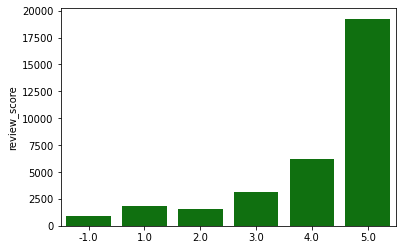

In [15]:
x=dframe_train['review_score'].value_counts()
print(x)
sns.barplot(x.index,x, color='green')


In [16]:
# Summary statistics for numerical features which is our review score
dframe_train.describe()

,review_score
count,32918.000000
mean,4.088098
std,1.434291
min,-1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


video_games            21732
musical_instruments    10280
Name: product_category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


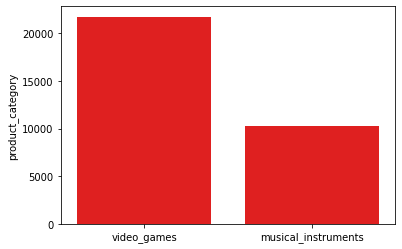

In [17]:
x=dframe_train['product_category'].value_counts()
print(x)
sns.barplot(x.index,x, color='red')

We can see from the data that we have a negative review score of -1 which we have to get rid of as we can not have a negative review score lower than 1.

We also have to first check how many missing values we have in each category

In [18]:
# number of missing values for review score, product category and text review
print ('The amount of missing values that review_id has is:')
print(dframe_train["review_id"].isnull().sum())

print ('The amount of missing values that text has is:')
print(dframe_train["text"].isnull().sum())

print ('The amount of missing values that verified has is:')
print(dframe_train["verified"].isnull().sum())

print ('The amount of missing values that review_score has is:')
print(dframe_train["review_score"].isnull().sum())

print ('The amount of missing values that product_category has is:')
print(dframe_train["product_category"].isnull().sum())





The amount of missing values that review_id has is:
0
The amount of missing values that text has is:
12
The amount of missing values that verified has is:
105
The amount of missing values that review_score has is:
0
The amount of missing values that product_category has is:
906


We can also check for duplicate values

In [19]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = dframe_train[dframe_train.duplicated()]

In [20]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [review_id, text, verified, review_score, product_category]
Index: []


In [21]:
print("Duplicate Rows except first occurrence based on all columns are :") 
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [review_id, text, verified, review_score, product_category]
Index: []


We can see that there are no duplicates 

So now we can work on getting rid of our missing values

For CATEGORICAL features, we want to use the Pandas function value_counts() to obtain information about how many categories there are and how many instances of each.

In [22]:
# let's list all categorical features
categorical_columns= ['verified', 'review_score', 'product_category']

We previously changed the missing values from the review score to NaN. We will be replacing the missing values with the mean. 

We will first replace our negative loan amounts with NaN

In [23]:
# replace negative loan amount values with NaN 
# (we use np.nan because that's how the other missing values are represented in this dataset)
dframe_train.loc[amazon_reviews.review_score<0,'review_score'] = np.nan

No we will replace the values of NaN with mean values

In [24]:
# handling missing data
from sklearn.impute import SimpleImputer 

dframe_train_no_nans =  dframe_train.copy()

# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'mean')  


# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['review_score']
imptr_num = imptr_num.fit(dframe_train_no_nans[numerical_columns])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
dframe_train_no_nans[numerical_columns] = \
  imptr_num.transform(amazon_reviews[numerical_columns]) 

# note column ApplicantIncome in the first row --> before it was a missing value!
dframe_train_no_nans

,review_id,text,verified,review_score,product_category
0,product_review_000000,guitars look new.,False,5.0,musical_instruments
1,product_review_000001,"I'd heard this game had crude humor, but man i...",True,4.0,video_games
2,product_review_000002,It's a decent game but nothing nearly as good ...,True,4.0,video_games
3,product_review_000003,This device worked exceptionally well for my X...,False,5.0,video_games
4,product_review_000004,"great racing game, with a lot of cool cars to ...",True,4.0,video_games
...,...,...,...,...,...
32913,product_review_032913,OVERALL: This game is a must-buy by all standa...,False,5.0,video_games
32914,product_review_032914,I must say that I have all but given up on Son...,True,4.0,video_games
32915,product_review_032915,After considering various options for my 1976 ...,True,5.0,musical_instruments
32916,product_review_032916,We have had this for 1 day. But the charger it...,True,4.0,video_games


We then need to replace our missing values from our categorical. We will be using the mode which will replace missing values with the most common values.

In [25]:
# 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(dframe_train_no_nans[categorical_columns])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
dframe_train_no_nans[categorical_columns] = imptr_cat.transform(dframe_train_no_nans[categorical_columns]) 

The data is unbalanced as we could see from our previous bar charts, so I would need to either oversample the data or undersample the data. I have chosen to oversample to balance the data.

Random over-sampling:
video_games            22638
musical_instruments    10280
Name: product_category, dtype: int64


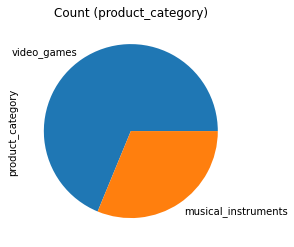

In [26]:
# Class count
count_class_0, count_class_1 = dframe_train_no_nans.product_category.value_counts()

# Divide by class
df_class_0 = dframe_train_no_nans[dframe_train_no_nans['product_category'] == 'musical_instruments']
df_class_1 = dframe_train_no_nans[dframe_train_no_nans['product_category'] == 'video_games']

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.product_category.value_counts())

df_test_over.product_category.value_counts().plot(kind='pie', title='Count (product_category)');

We can now go ahead and begin processing our text

These are the modules that we will need

In [27]:
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [28]:
#Loading models and datasets
!pip install ml-datasets

In [29]:
# We will use a package called spacy, which gets updated frequently
!pip install --upgrade spacy

In [30]:
# spacy needs language models - let's make sure they are downloaded
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

     |████████████████████████████████| 12.8 MB 506 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 33.5 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [31]:
import sklearn.model_selection
import spacy
from ml_datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # another useful visualization library 

In [32]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_md')

We will now normalise our text. We will first build our code, apply it on random text and then apply it onto our data.

In [33]:
text = " Hi my name is Angela, my favourite number is 8 which is < 10. What is your favourite colour? Prime colours are: red, blue, yellow."

def preprocess(text):
    text = text.lower()
    text=text.strip()
    text=re.compile('<.*?>').sub('', text)
    text = re.sub(r'\s+',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text = re.sub('\s+', ' ', text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)
    
    return text

text=preprocess(text)
print(text)

hi my name is angela my favourite number is   which is    what is your favourtite colour prime colours are red blue yellow


As we can see we have gotten rid of all numbers and punctuation characters. It has also gotten rid of capital letters which is important as capital letters cause the word to have a higher value, even if it is the same word.

In [34]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')] #it is important for us to specifiy english as there may be reviews in other languages
    return ' '.join(a)

text=stopword(text)
print(text)

snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) 
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(a)

text = lemmatizer(text)
print(text)

hi name angela favourite number favourtite colour prime colours red blue yellow
hi name angela favourit number favourtit colour prime colour red blue yellow
hi name angela favourit number favourtit colour prime colour red blue yellow


In [36]:
# get the list of stopwords
stopwords = nlp.Defaults.stop_words
print(f"There are {len(stopwords)} stop words, which are:")
print(sorted(stopwords))

There are 326 stop words, which are:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hav

modules to import to for Lemmatization for stop words

In [39]:
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [40]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_test_over['clean_text'] = df_test_over['text'].astype(str).apply(lambda x: finalpreprocess(x)) #the clean text is what we shall be using

In [41]:
dframe_train_no_nans.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,guitars look new.,False,5.0,musical_instruments
1,product_review_000001,"I'd heard this game had crude humor, but man i...",True,4.0,video_games
2,product_review_000002,It's a decent game but nothing nearly as good ...,True,4.0,video_games
3,product_review_000003,This device worked exceptionally well for my X...,False,5.0,video_games
4,product_review_000004,"great racing game, with a lot of cool cars to ...",True,4.0,video_games


We now need to tokenize the clean text

In [42]:
df_test_over['clean_text_tok']=[nltk.word_tokenize(i) for i in df_test_over['clean_text']] 


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec

        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

We will now split the data

In [47]:
dframe_test_over = df_test_over.drop(columns=['text'])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [56]:

X_train, X_val, y_train, y_val = train_test_split(df_test_over["clean_text"],
                                                  df_test_over["product_category"],
                                                  test_size=0.3,
                                                  shuffle=True)

In [57]:
y_val1 = y_val.map({'musical_instruments': 1, 'video_games': 0}).astype(int)

We now need to vectorize our data

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
import io

                     precision    recall  f1-score   support

musical_instruments       0.86      0.95      0.90      3061
        video_games       0.98      0.93      0.95      6815

           accuracy                           0.94      9876
          macro avg       0.92      0.94      0.93      9876
       weighted avg       0.94      0.94      0.94      9876

Confusion Matrix: [[2913  148]
 [ 474 6341]]


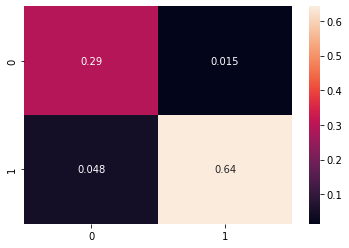

In [59]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,1))
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)
from sklearn.metrics import classification_report
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',max_iter=300,class_weight='balanced')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model


y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

target_names = ['musical_instruments','video_games']  
clf_report = classification_report(y_val,y_predict)
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [60]:
import gensim
from gensim.models import Word2Vec 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [62]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectors_tfidf, y_train) 
y_predict= knn.predict(X_val_vectors_tfidf)

print(classification_report(y_val,y_predict))

                     precision    recall  f1-score   support

musical_instruments       0.66      0.32      0.43      3061
        video_games       0.75      0.92      0.83      6815

           accuracy                           0.74      9876
          macro avg       0.70      0.62      0.63      9876
       weighted avg       0.72      0.74      0.71      9876



                     precision    recall  f1-score   support

musical_instruments       0.84      0.90      0.87      3061
        video_games       0.96      0.92      0.94      6815

           accuracy                           0.92      9876
          macro avg       0.90      0.91      0.90      9876
       weighted avg       0.92      0.92      0.92      9876

Confusion Matrix: [[2770  291]
 [ 539 6276]]


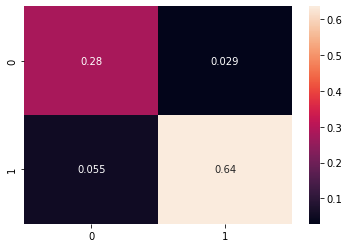

In [64]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(2,2))
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',max_iter=300,class_weight='balanced')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  


y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [65]:
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


                     precision    recall  f1-score   support

musical_instruments       0.75      0.93      0.83      3061
        video_games       0.97      0.86      0.91      6815

           accuracy                           0.88      9876
          macro avg       0.86      0.89      0.87      9876
       weighted avg       0.90      0.88      0.88      9876

Confusion Matrix: [[2850  211]
 [ 962 5853]]


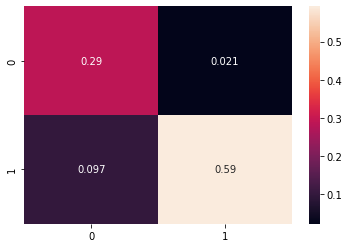

In [66]:
model = Word2Vec(df_test_over['clean_text_tok'],min_count=1)  
w2v = dict(zip(model.wv.index2word, model.wv.syn0))  

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      

modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)



lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',class_weight='balanced')
lr_w2v.fit(X_train_vectors_w2v, y_train)  
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score



knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectors_w2v, y_train) 

y_predict= knn.predict(X_val_vectors_w2v)

print(classification_report(y_val,y_predict))

                     precision    recall  f1-score   support

musical_instruments       0.85      0.84      0.85      3061
        video_games       0.93      0.94      0.93      6815

           accuracy                           0.91      9876
          macro avg       0.89      0.89      0.89      9876
       weighted avg       0.90      0.91      0.90      9876



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


                     precision    recall  f1-score   support

musical_instruments       0.76      0.93      0.84      3061
        video_games       0.97      0.87      0.91      6815

           accuracy                           0.89      9876
          macro avg       0.86      0.90      0.87      9876
       weighted avg       0.90      0.89      0.89      9876

Confusion Matrix: [[2854  207]
 [ 913 5902]]


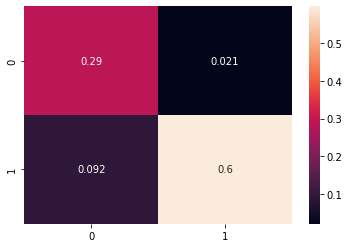

In [68]:
model = Word2Vec(df_test_over['clean_text_tok'],min_count=10)  
w2v = dict(zip(model.wv.index2word, model.wv.syn0))  

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      


modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)



lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',class_weight='balanced')
lr_w2v.fit(X_train_vectors_w2v, y_train) 
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

We will now test it on our old data

In [69]:
df_test=pd.read_csv('processed_reviews_split_surnamesA_minimal.csv')  
df_test['clean_text'] = df_test['text'].astype(str).apply(lambda x: finalpreprocess(x)) 

Now that we have tested the prediction method on our old code, we obviously want it to be able to work on any new data given. So we will try the code on random data

In [70]:
X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test) 
y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['product_category']= y_predict
print(df_test[:10])
final=df_test[['clean_text','product_category','predict_prob']].reset_index(drop=True)
final.to_csv('submission_product_category.csv')

               review_id                                               text  \
0  product_review_000000                                 guitars look new.    
1  product_review_000001  I'd heard this game had crude humor, but man i...   
2  product_review_000002  It's a decent game but nothing nearly as good ...   
3  product_review_000003  This device worked exceptionally well for my X...   
4  product_review_000004  great racing game, with a lot of cool cars to ...   
5  product_review_000005  This is a great game for adults or those that ...   
6  product_review_000006  Was about to send it back, was tuned too low, ...   
7  product_review_000007  I play a lot of guitar.  Truthfully, I don't h...   
8  product_review_000008  I built a custom cab for this speaker an am dr...   
9  product_review_000009  Good pruduct it's pretty dicent but the microp...   

  verified  review_score     product_category  \
0    False           5.0  musical_instruments   
1     True           4.0        

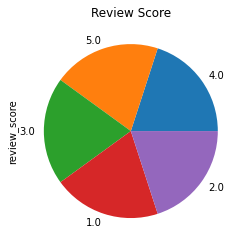

In [78]:
from sklearn.utils import resample
df_minority5 = df_test_over[df_test_over['review_score']==2]
df_majority1 = df_test_over[df_test_over['review_score']==4]
df_majority2 = df_test_over[df_test_over['review_score']==5]
df_majority3 = df_test_over[df_test_over['review_score']==3]
df_majority4 = df_test_over[df_test_over['review_score']==1]

maj_class1 = resample(df_majority1, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222) 
maj_class2 = resample(df_majority2, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222) 
maj_class3 = resample(df_majority3, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222) 
maj_class4 = resample(df_majority4, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222) 
maj_class5 = resample(df_minority5, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222) 
maj_class6 = resample(df_class_0, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222)
maj_class7 = resample(df_class_1, 
                           replace=True,     
                           n_samples=19847,    
                           random_state=222)

df_test_over1=pd.concat([maj_class1,maj_class2,maj_class3,maj_class4, maj_class5])

df_test_over1.review_score.value_counts().plot(kind='pie', title='Review Score');

In [72]:
X_train, X_val, y_train, y_val = train_test_split(df_test_over1["clean_text"],
                                                  df_test_over1["review_score"].values,
                                                  test_size=0.3,
                                                  shuffle=True)

In [73]:
y_train  = y_train.astype('int')

In [74]:
y_val  = y_val.astype('int')

              precision    recall  f1-score   support

           1       0.97      0.99      0.98      5883
           2       0.97      0.98      0.97      6008
           3       0.93      0.95      0.94      6020
           4       0.87      0.84      0.85      5909
           5       0.85      0.83      0.84      5951

    accuracy                           0.92     29771
   macro avg       0.92      0.92      0.92     29771
weighted avg       0.92      0.92      0.92     29771

Confusion Matrix: [[5852    4    0    5   22]
 [  71 5868   14   23   32]
 [  22   44 5691  101  162]
 [  31   75  198 4972  633]
 [  77   84  232  626 4932]]


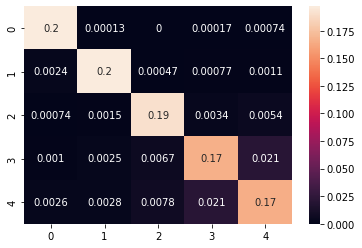

In [76]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,1))
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',max_iter=300,class_weight='balanced')
lr_tfidf.fit(X_train_vectors_tfidf, y_train) 


y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [77]:

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectors_tfidf, y_train) 
y_predict= knn.predict(X_val_vectors_tfidf)

print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71      5883
           2       0.98      0.99      0.99      6008
           3       0.96      0.91      0.93      6020
           4       0.87      0.76      0.81      5909
           5       0.91      0.32      0.47      5951

    accuracy                           0.80     29771
   macro avg       0.85      0.80      0.78     29771
weighted avg       0.85      0.80      0.78     29771



              precision    recall  f1-score   support

           1       1.00      0.98      0.99      5883
           2       1.00      0.99      0.99      6008
           3       0.99      0.98      0.98      6020
           4       0.94      0.94      0.94      5909
           5       0.90      0.93      0.92      5951

    accuracy                           0.97     29771
   macro avg       0.97      0.97      0.97     29771
weighted avg       0.97      0.97      0.97     29771

Confusion Matrix: [[5785    0    0    0   98]
 [   0 5920    0    9   79]
 [   3    0 5898   13  106]
 [   1    3   34 5566  305]
 [  18   11   47  311 5564]]


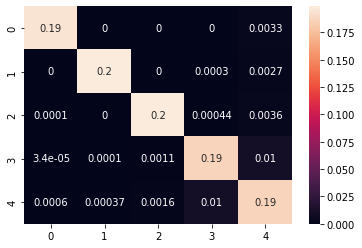

In [79]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(2,2))
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',max_iter=300,class_weight='balanced')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  


y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))



sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


              precision    recall  f1-score   support

           1       0.52      0.69      0.59      5883
           2       0.36      0.37      0.37      6008
           3       0.38      0.29      0.33      6020
           4       0.40      0.33      0.36      5909
           5       0.56      0.60      0.58      5951

    accuracy                           0.45     29771
   macro avg       0.44      0.46      0.45     29771
weighted avg       0.44      0.45      0.44     29771

Confusion Matrix: [[4031 1069  351  191  241]
 [1818 2217  944  608  421]
 [ 898 1482 1747 1121  772]
 [ 491  958 1100 1943 1417]
 [ 500  403  483  973 3592]]


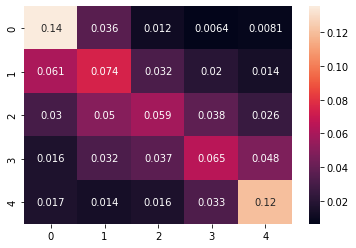

In [80]:
model = Word2Vec(df_test_over['clean_text_tok'],min_count=1)  
w2v = dict(zip(model.wv.index2word, model.wv.syn0))  

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      

modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)



lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',class_weight='balanced')
lr_w2v.fit(X_train_vectors_w2v, y_train)  
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 


sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [81]:

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectors_w2v, y_train) 
y_predict= knn.predict(X_val_vectors_w2v)

print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96      5883
           2       0.91      0.99      0.95      6008
           3       0.83      0.94      0.88      6020
           4       0.78      0.80      0.79      5909
           5       0.86      0.60      0.71      5951

    accuracy                           0.86     29771
   macro avg       0.86      0.86      0.86     29771
weighted avg       0.86      0.86      0.86     29771



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


              precision    recall  f1-score   support

           1       0.52      0.68      0.59      5883
           2       0.36      0.37      0.36      6008
           3       0.37      0.28      0.32      6020
           4       0.41      0.34      0.37      5909
           5       0.56      0.60      0.58      5951

    accuracy                           0.45     29771
   macro avg       0.44      0.46      0.45     29771
weighted avg       0.44      0.45      0.44     29771

Confusion Matrix: [[4006 1057  383  197  240]
 [1842 2198  881  713  374]
 [ 868 1575 1691 1083  803]
 [ 455  920 1107 2032 1395]
 [ 493  404  484  973 3597]]


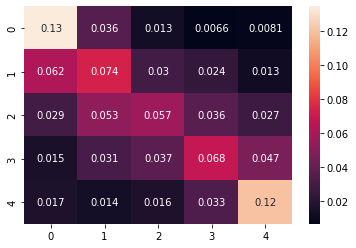

In [82]:
model = Word2Vec(df_test_over['clean_text_tok'],min_count=10)  
w2v = dict(zip(model.wv.index2word, model.wv.syn0))  

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)



lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2',class_weight='balanced')
lr_w2v.fit(X_train_vectors_w2v, y_train)  
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 

sns.heatmap(confusion_matrix(y_val,y_predict, normalize='all'), annot=True)

In [83]:

X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test) 
y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['review_score']= y_predict
print(df_test.head())
final=df_test[['clean_text','review_score','predict_prob']].reset_index(drop=True)


               review_id                                               text  \
0  product_review_000000                                 guitars look new.    
1  product_review_000001  I'd heard this game had crude humor, but man i...   
2  product_review_000002  It's a decent game but nothing nearly as good ...   
3  product_review_000003  This device worked exceptionally well for my X...   
4  product_review_000004  great racing game, with a lot of cool cars to ...   

  verified  review_score     product_category  \
0    False             5  musical_instruments   
1     True             4          video_games   
2     True             4          video_games   
3    False             5          video_games   
4     True             4          video_games   

                                          clean_text  predict_prob  
0                                    guitar look new      0.037747  
1  heard game crude humor man worse expect love h...      0.008719  
2  decent game nothing 